In [1]:
import os
os.chdir("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from utilities.utils import remove_exceptions_from_df, prep_df_for_isolated_analysis

# Introduction
In this file we will be exploring agricultural data provided by Lithuanian National Data Agency.
Main goal of this exploration is to find tendencies amongst Lithuanian beekeepers, we are interested in average//small beekeeping farm, and profitability. For this purpose we will not be analysing any data that is capped at the maximum.
## Data cleaning
As mentioned previously we want to remove records that do not provide accurate data before we begin analysis. That means that we will be removing  records that are mentioned as the exceptions in the readme file. This choice is made because in this data set there is no reliable way to differentiante between a farm that keeps 100 families of bees and 200. Similar logic applies for other "exceptions" as well.

In [2]:
farm_df = pd.read_csv("data/Lietuvos_Respublikos_2020_metu_visuotinio_zemes_ukio_surasymo_duomenys.csv",index_col="objectid")

We will be removing columns that will not be used in this analysis. In this case theese provide gender of the owner of the farm as well as a coordinates of the farm. Gender is removed since it is not relevant for our analysis, and coordinates will be removed because even though documentation says that it should be using LKS-94 (EPSG:3346) it does not actually provide accurate picture when used as geographical data.  Also we will be only looking into farms that don't keep any other animals, since we are interested in viability of having a farm that only keeps bees as an income source. 

In [3]:
farm_df.drop(["u_vld_lytis","X","Y"],axis = 1,inplace = True)
farm_df = remove_exceptions_from_df(farm_df)
farm_df = prep_df_for_isolated_analysis(farm_df,'f_2031_k')
farm_df

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,u_eko,f_101_k,f_100_k,f_105_k,f_104_k,f_1037_k,ukininkavimo_kryptis,f_107_k,ekonominio_dydzio_klase,f_106_k,f_109_k,f_108_k,standartine_produkcija_k,f_2031_k,sal_gyv_k
objectid,,,,,,,,,,,,,,,,,,,,
24,0,5,0,5,0,0,0,5,0,0,0,8,0,2,0,0,0,2500,20,0
153,0,8,0,8,0,0,7,1,0,0,0,8,0,1,0,0,0,2000,10,0
154,0,3,0,3,0,0,2,1,0,0,0,6,0,1,0,0,0,1500,5,0
191,0,3,0,3,0,0,3,0,0,0,0,8,0,1,0,0,0,1000,10,0
260,0,5,0,6,0,0,0,5,0,0,0,8,0,2,0,0,0,3500,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131841,0,1,1,2,0,0,0,1,0,0,0,8,0,1,0,0,0,1500,10,0
131866,0,0,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,1000,10,0
131872,0,1,0,1,0,0,1,0,0,0,0,8,0,1,0,0,0,1500,15,0


Afterwards we will make sure that the data is limited only to the farms on smaller side since smaller land plots are more available for those who want to start farming. 
## Initial analysis
Once the data is filtered we will take a look at the correleation matrix, to get a general picture of the data.


Text(0.5, 47.5815972222222, 'correlations')

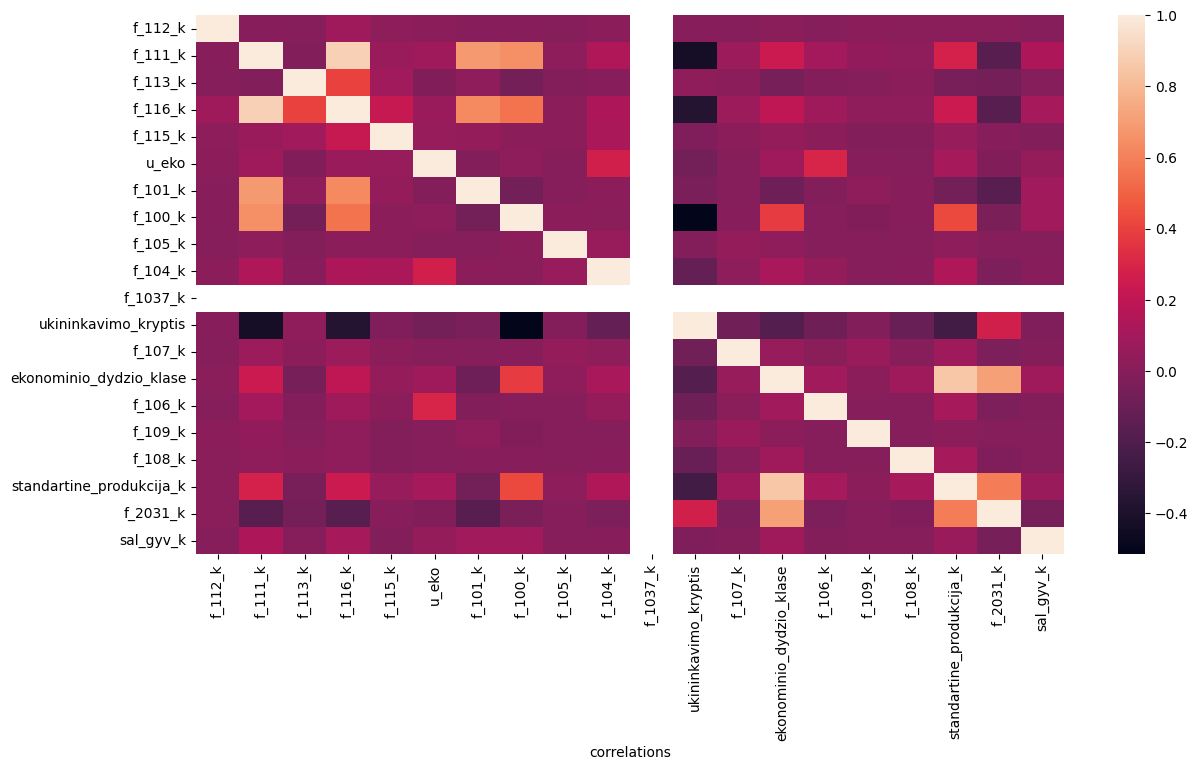

In [4]:
df_filtered = farm_df[
    (farm_df['f_116_k'] <= 10) & (farm_df['ekonominio_dydzio_klase'] < 8)
].copy()
cor_matrix = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(data=cor_matrix, annot=False)
plt.xlabel("correlations")

## Bee families and economic class
At first we should take a look if there is any real correalation between bee families kept and economic size class of the farm.
if we take a look at this box plot we can see that median of the seems to be increasing up till the farm reaches class 4 (8,000–< 15,000 EUR). Afterwards it falls off suggesting that bees do not contribute towards economic welbeing of the farm.

<AxesSubplot: title={'center': 'Distribution of f_2031_k (bee families) by economic size class'}, xlabel='economic size class', ylabel='f_2031_k'>

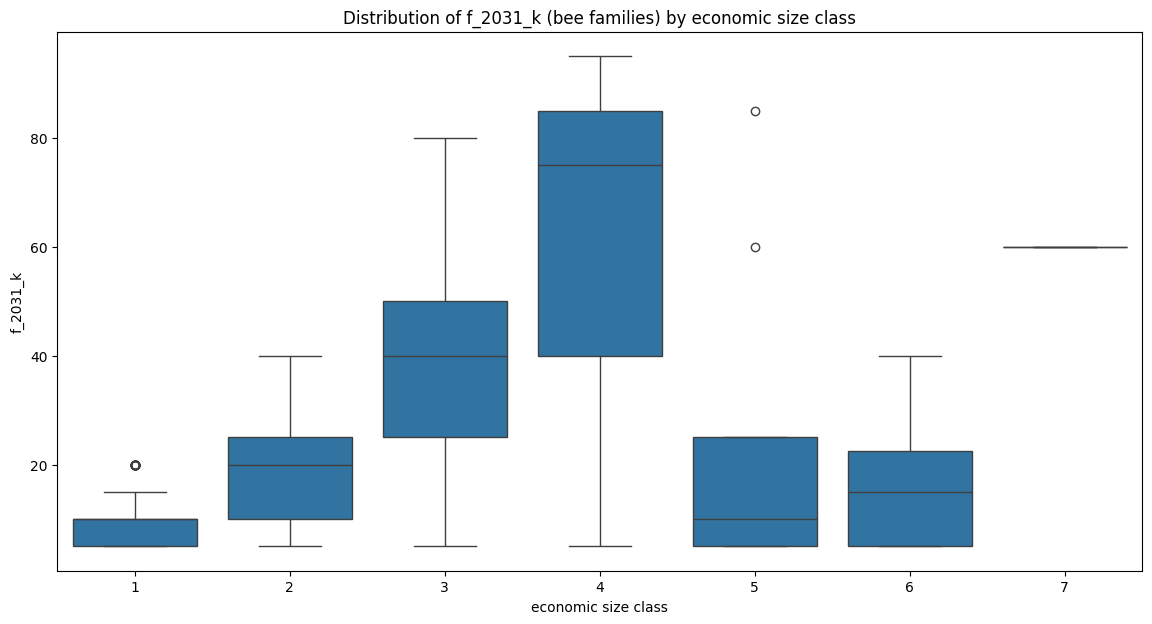

In [5]:
plt.figure(figsize=(14, 7))
plt.title("Distribution of f_2031_k (bee families) by economic size class")
plt.xlabel("economic size class")
sns.boxplot(x='ekonominio_dydzio_klase', y='f_2031_k', data=df_filtered)

At first glance it may look like number of bee families correlate with economic class, up to 5th class, then it drops.
Lets look deeper into this graph, and break down each class into their (declared) farming type.

C:\Users\pleri\AppData\Local\Temp\ipykernel_12008\2148821743.py:4: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(


<AxesSubplot: title={'center': 'Distribution of f_2031_k (bee families) by economic size class'}, xlabel='economic size class', ylabel='f_2031_k'>

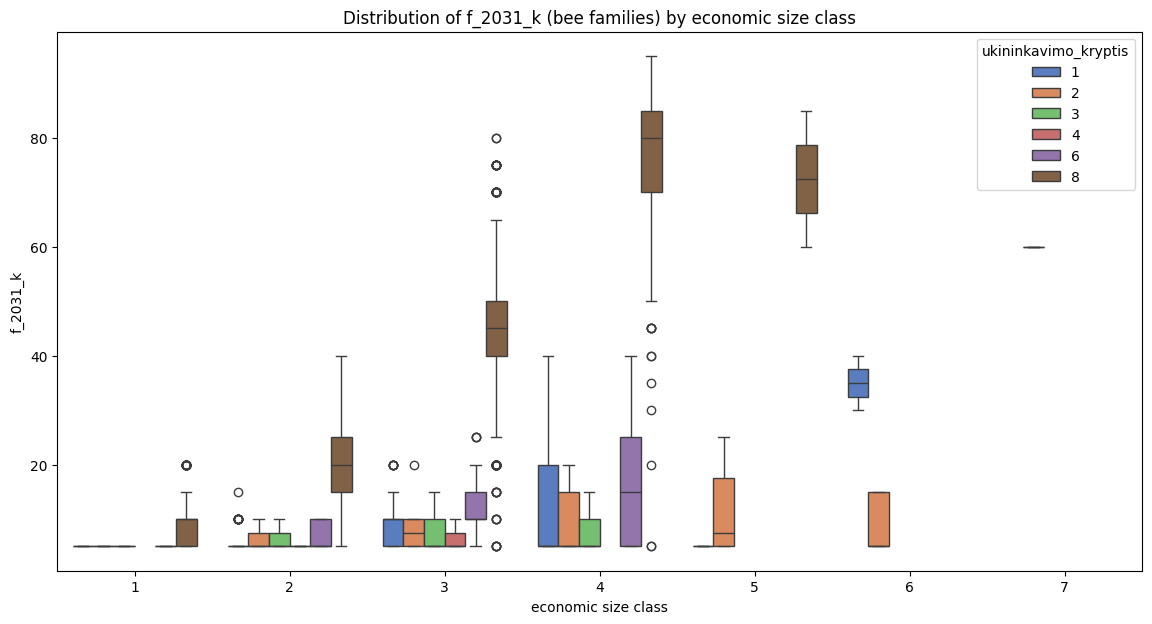

In [10]:
plt.figure(figsize=(14, 7))
plt.title("Distribution of f_2031_k (bee families) by economic size class")
plt.xlabel("economic size class")
sns.boxplot(
    x='ekonominio_dydzio_klase',
    y='f_2031_k',
    hue='ukininkavimo_kryptis',
    palette=sns.color_palette("muted"),
    data=df_filtered
)

As we can see we may have fallen to simpsons paradox here. If we focus on farming type 8 (Mixed crop and livestock farming), which is probably closest to beekeeping in this situation, since we filtered out all farms that keep any other animals. We can see that correlation does not stop at economic class 4. However it drops at class 5 and then stops fully moving forward. This could be due to the fact that we filtered out all farms that have reached maximum cap previously. Since we are mainly interested in small farms going only up to 95 bee families is fine for the purposes of this analysis.  
## Bee families and Standardized production
Moving forward we should take a look at the correlation between bee families kept and ztandartized production, since that is closest measurement to the income of the farm.

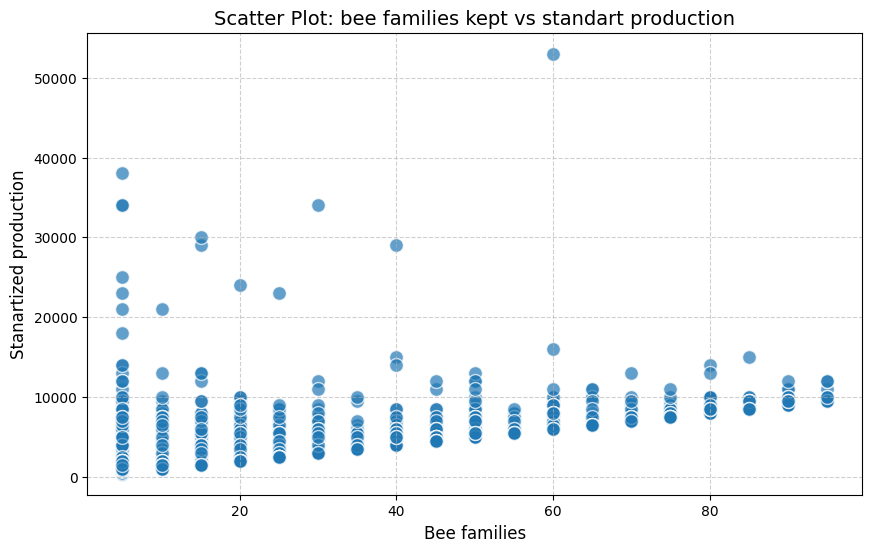

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['f_2031_k'], df_filtered['standartine_produkcija_k'], alpha=0.7, edgecolors='w', s=100)
plt.title(f"Scatter Plot: bee families kept vs standart production", fontsize=14)
plt.ylabel('Standardized production', fontsize=12)
plt.xlabel('Bee families', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

As we can see there are quite a few outliers in the scatterplot, especially towards the begining.Lets take a closer look at them.

In [7]:
df_filtered[(df_filtered['standartine_produkcija_k']>=25000)]

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,u_eko,f_101_k,f_100_k,f_105_k,f_104_k,f_1037_k,ukininkavimo_kryptis,f_107_k,ekonominio_dydzio_klase,f_106_k,f_109_k,f_108_k,standartine_produkcija_k,f_2031_k,sal_gyv_k
objectid,,,,,,,,,,,,,,,,,,,,
68042,0,9,0,9,0,0,0,9,0,0,0,2,0,7,0,0,0,53000,60,0
75969,0,7,0,7,0,0,3,2,0,0,0,2,3,5,0,0,0,25000,5,0
87908,0,7,0,8,1,0,3,4,0,0,0,2,0,6,0,0,0,29000,15,0
96069,0,8,0,8,0,0,0,7,0,1,0,2,0,6,0,0,0,34000,5,0
106346,0,7,2,9,0,0,0,7,0,0,0,2,0,6,0,0,0,38000,5,0
112418,0,9,0,9,1,0,0,8,0,0,0,2,0,6,0,0,0,34000,5,0
127355,0,7,0,7,0,1,0,4,0,3,0,1,0,6,0,0,0,34000,30,0
130814,0,10,0,10,0,0,0,10,0,0,0,1,0,6,0,0,0,29000,40,0
131104,0,2,0,3,0,0,0,2,0,0,0,2,0,6,0,0,0,30000,15,0


It seems that these farms generate substantial part of their income not from bee keeping but from usage of land (like growing vegetables and such) so in this case they are truly outliers and we can disregard them. 

<AxesSubplot: title={'center': 'Economic stardized production distribution'}, xlabel='Number of bee families', ylabel='Standardized production'>

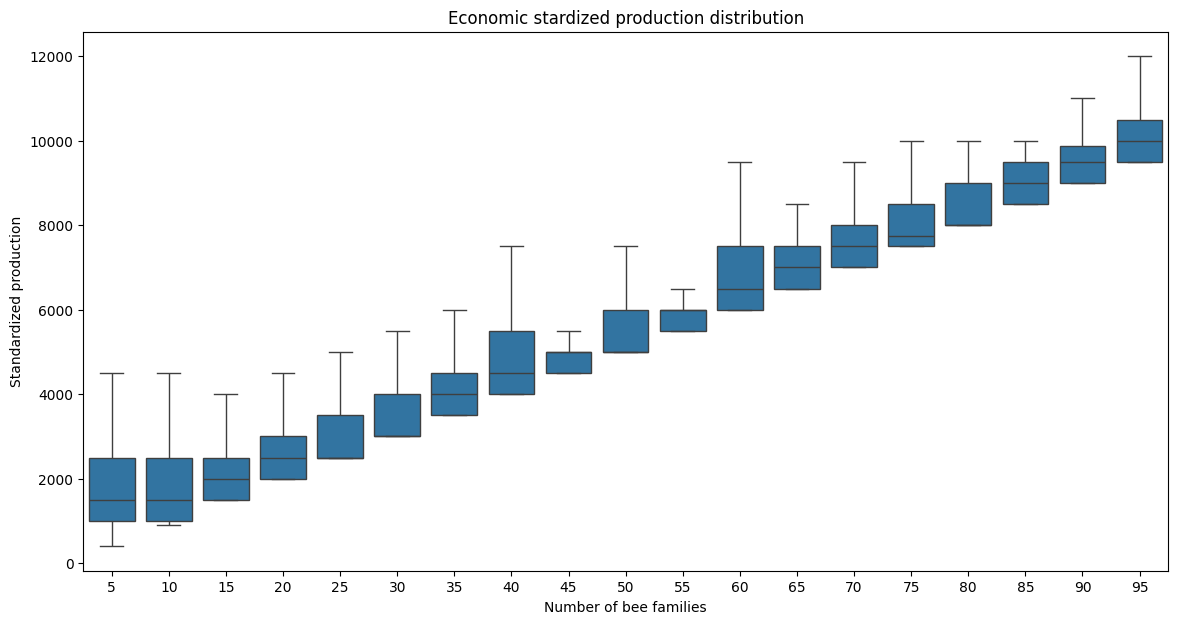

In [16]:
plt.figure(figsize=(14, 7))
plt.title("Economic stardized production distribution")
plt.xlabel("Number of bee families")
plt.ylabel("Standardized production")
sns.boxplot(
    x='f_2031_k',
    y='standartine_produkcija_k',
    showfliers=False,
    data=df_filtered
)

Just like before we may be suffering from simpsons paradox, thus we should break this down into farming types.

C:\Users\pleri\AppData\Local\Temp\ipykernel_12008\223168490.py:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(


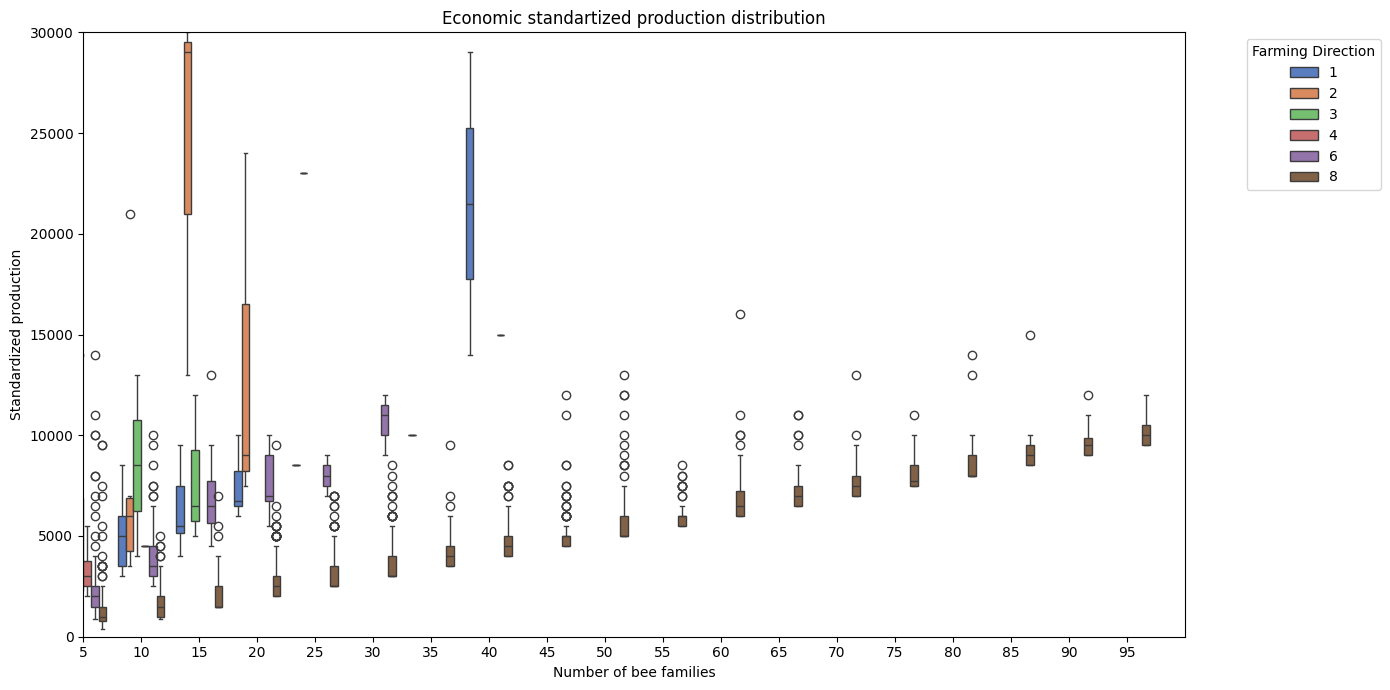

In [15]:
plt.figure(figsize=(14, 7))
plt.title("Economic standartized production distribution")
plt.xlabel("Number of bee families")
plt.ylabel("Standardized production")
sns.boxplot(
    x='f_2031_k',
    y='standartine_produkcija_k',
    hue='ukininkavimo_kryptis',
    palette=sns.color_palette("muted"),
    showfliers=True,
    data=df_filtered
)
plt.xlim(0, 19)
plt.ylim(0, 30000)
plt.legend(title="Farming Direction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

With this breakdow we can see that what we considered outliers, are not neceserally outliers. However we can see clear correalation between bee colonies and standardized production. 
## Conclusion
From the first look it may seem that in order to have standardized production which would be equivavalent to around average salary a person would have to keep nearly 80 bee families, which makes beekeeping as a primary source of income not scalable. However if bees are kept as a suplementary income they may be a viable solution.